In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
files.upload()

Saving Heart attack analysis and prediction dataset final.csv to Heart attack analysis and prediction dataset final.csv


{'Heart attack analysis and prediction dataset final.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1

In [6]:
df = pd.read_csv('Heart attack analysis and prediction dataset final.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


Handling/Imputing missing values

In [9]:
df=df.dropna(axis=0,subset=['sex'])

In [10]:
df.shape

(303, 14)

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [12]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='mean')
impute.fit(df[['chol']])
df['chol']=impute.transform(df[['chol']])

In [13]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='mean')
impute.fit(df[['thalachh']])
df['thalachh']=impute.transform(df[['thalachh']])

In [14]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


Splitting dataset

In [15]:
X=df.drop(columns='output',axis=1)
Y=df['output']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=43)

Feature Scaling


In [ ]:
#from pandas.core.groupby.groupby import Scalar
#from sklearn.preprocessing import MinMaxScaler
#Scalar=MinMaxScaler()
#Scalar.fit(X_train)


In [ ]:
#X_train_Scaled=Scalar.transform(X_train)

In [ ]:
#X_test_Scaled=Scalar.transform(X_test)

Training the model using Logistic Regression with the processed data

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
prediction=model.predict(X_test)
print ("print True heart attack chances       :", Y_test.values[:20])
print ("print Predicted heart attack chances  :", prediction[:20])

print True heart attack chances       : [1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0]
print Predicted heart attack chances  : [1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
print(f'Accuracy of the model: {round(accuracy_score(Y_test,prediction)*100,2)}%')

Accuracy of the model: 83.61%


In [20]:
log_accr = round(accuracy_score(Y_test,prediction)*100,2)
print(log_accr)

83.61


F1-score, Precision and Recall

---



In [21]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [22]:
print(f'f1-score :{round(f1_score(Y_test, prediction),2)}')
print(f'precison :{round(precision_score(Y_test, prediction),2)}')
print(f'recall   :{round(recall_score(Y_test, prediction),2)}')

f1-score :0.85
precison :0.85
recall   :0.85


Testing an input data

In [23]:
testing_prediction_input=(46,1,0,120,249,0,0,144,0,0.8,2,0,3)
testing_prediction_input_as_numpy_array=np.asarray(testing_prediction_input)
reshaped_data=testing_prediction_input_as_numpy_array.reshape(1,-1)
predictn=model.predict(reshaped_data)
if(predictn[0]==0):
  print('The person has less chance of having a heart attack. ')
else:
  print('The person has more chance of having a heart attack. ')

The person has less chance of having a heart attack. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
print(f'Confusion Matrix: {(confusion_matrix(Y_test,prediction))}')

Confusion Matrix: [[23  5]
 [ 5 28]]


In [25]:
sns.set()
from mlxtend.plotting import plot_confusion_matrix

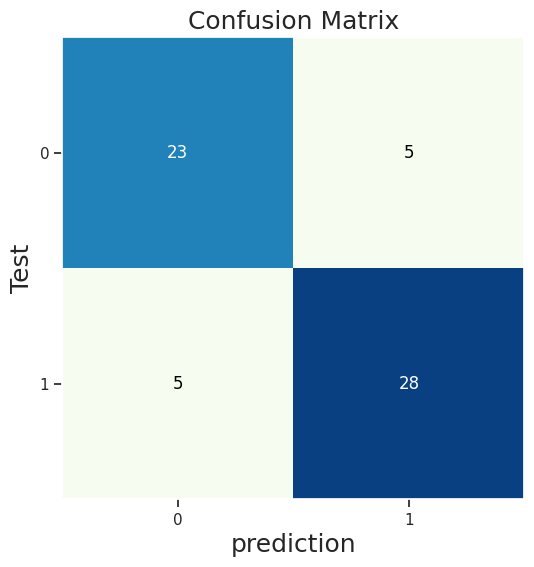

In [26]:
conf_matrix=confusion_matrix(y_true=Y_test,y_pred=prediction)
fig,ax=plot_confusion_matrix(conf_mat=conf_matrix,figsize=(6,6),cmap=plt.cm.GnBu)
plt.xlabel('prediction',fontsize=18)
plt.ylabel('Test',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

<Axes: >

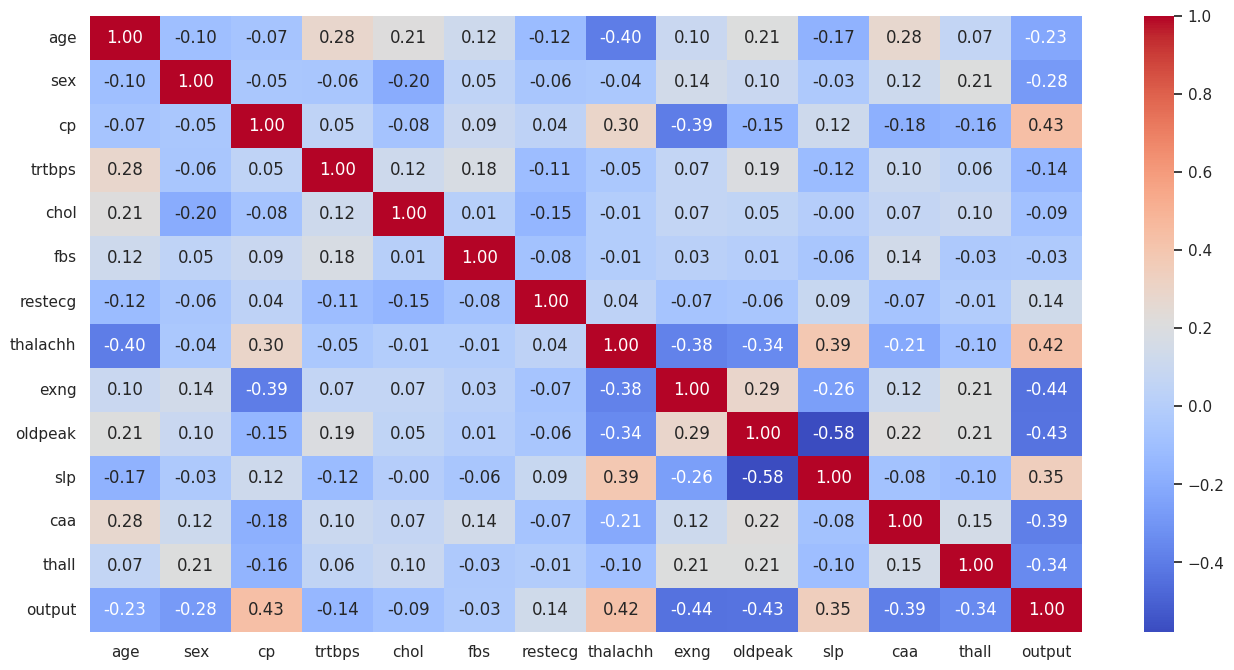

In [27]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='.2f')

Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df_clf=DecisionTreeClassifier(criterion='entropy',random_state=1)
df_clf.fit(X_train,Y_train)
y_pred=df_clf.predict(X_test)
dec_accr=accuracy_score(y_pred,Y_test)
print ('Accuracy:',dec_accr*100)


Accuracy: 80.32786885245902
